# Probability Distributions and the Central Limit Theorem

Markus Pfeil, Hochschule Ravensburg Weingarten

---

Here we will visualize, in Python, a few important distributions that commonly appear in science and statistics. A more exhaustive list of statistical distributions can be found in the [stats](http://docs.scipy.org/doc/scipy/reference/stats.html) module of SciPy. 

At the end of this IPython Notebook we will demonstrate what is arguably the most famous and profound theorem in statistics: the Central Limit Theorem.

In [1]:
from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

## Discrete Distributions

$\mathbf{Uniform}$:The probability of observing each value with the same probability.

* Example: Measurement with white noise

In [8]:
def func(mean,var, size): 
    s = var*stats.uniform.rvs(size)+mean
    fig, ax = plt.subplots(1, 1)
    ax.hist(s, density=True, histtype='stepfilled', alpha=0.2)
    plt.show()
    
interactive_plot = interact_manual(func, mean=(0.0,10.0), var=(0.0,10.0), size=(10,1000,10))
display(interactive_plot)

interactive(children=(FloatSlider(value=5.0, description='mean', max=10.0), FloatSlider(value=5.0, description…

<function __main__.func(mean, var, size)>

## Continuous Distributions

$\mathbf{GAUSSIAN (NORMAL)}$:
$P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty]$

* mean=$\mu$, variance=$\sigma^2$
* This distribution appears as the large N limit of the binomial distribution and the Central Limit Theorem.

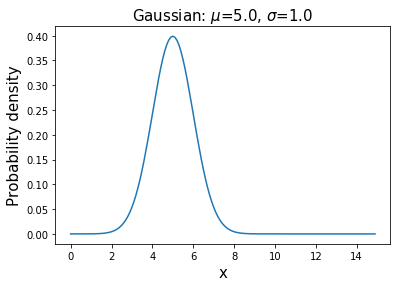

In [7]:
u=5 # mean
s=1 # standard deviation
x=np.arange(0,15,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

$\mathbf{EXPONENTIAL}$:
$P(x;k)=k e^{-kx}, \hspace{1in} x \in [0,\infty], \hspace{0.1in} k>0$

* mean=$1/k$,  variance=$1/k^2$
* This distribution describes the time intervals in a homogeneous Poisson process.

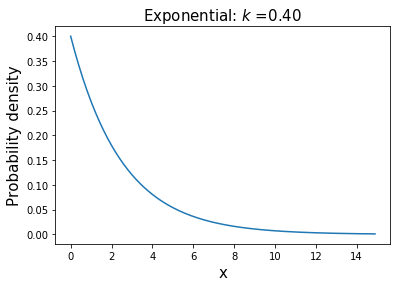

In [5]:
k=0.4
x=np.arange(0,15,0.1)
y=k*np.exp(-k*x)
plt.plot(x,y,'-')
plt.title('Exponential: $k$ =%.2f' % k,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

## Central Limit Theorem

> Take the mean of $n$ random samples from ANY arbitrary distribution with a well defined standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

Colloquially speaking, the theorem states that the average (or sum) of a set of random measurements will tend to a bell-shaped curve no matter the shape of the original meaurement distribution. This explains the ubiquity of the Gaussian distribution in science and statistics. We can demonstrate the Central Limit Thereom in Python by sampling from three different distributions: flat, exponential, and beta.

C:\Users\mopfe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


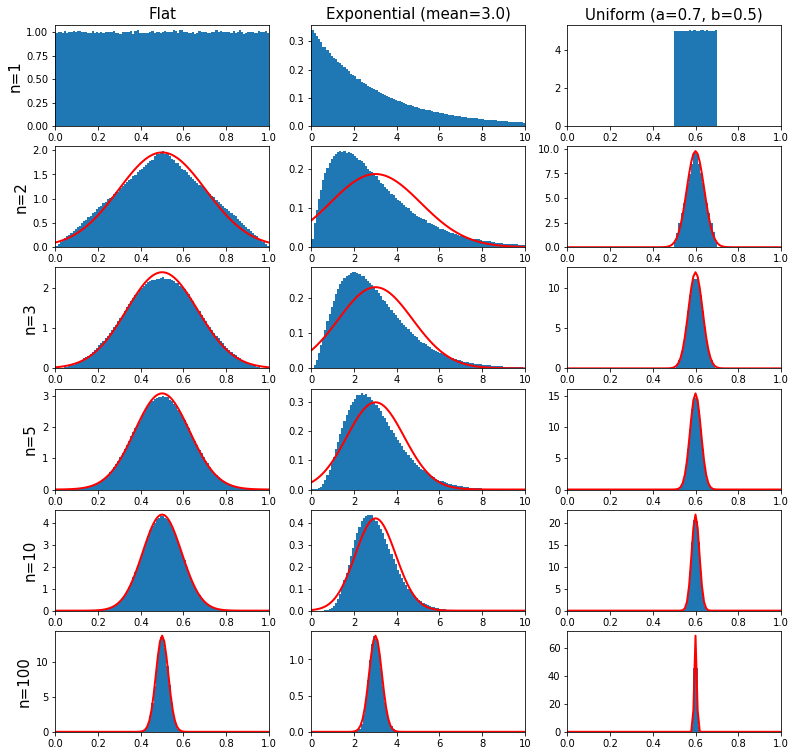

In [6]:
from functools import partial # provides capability to define function with partial arguments

N=1000000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of uniform distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.uniform,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Uniform (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,(a+b)/2]) # means of distributions
var=np.array([1/12,exp_mean**2,1/12*(b-a)*(b-a)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range(ln): # loop over number of n samples to average over
    for j in range(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'r',linewidth=2)     
plt.show()

In the graphs above the red curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also, 

- the mean of the Gaussian distribution is the same as the original parent distribution,
- the width of the Gaussian distribution scales as $1/\sqrt{n}$.